# Пересечение множества отрезков.

## Введение

   Даны $n$ отрезков. Вычислить множество точек, которые являются пересечением какой-нибудь пары этих отрезков. 

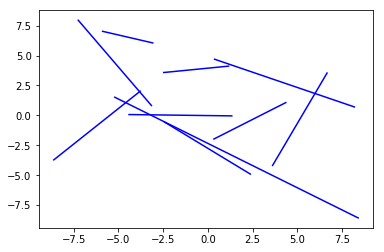

In [30]:
import notebook_helper

notebook_helper.intro()

## Решение №1

   Переберем все пары отрезков и добавим их точку пересечения, если она есть, в результирующее множество. Будем считать, что если отрезки пересекаются, то только в одной точке.

100  tests done
200  tests done
300  tests done
400  tests done
500  tests done
600  tests done
700  tests done
800  tests done
900  tests done
1000  tests done
Correct solution


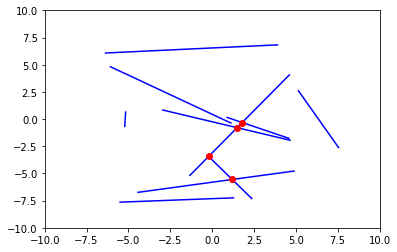

In [31]:
import bentley_ottman_helper
import notebook_helper


def segments_intersections_n2(segments):
    return bentley_ottman_helper.segments_intersection_n2(segments)


notebook_helper.silly_algorithm_testing(segments_intersections_n2)

## Ассимптотика

Очевидно, данное решение работает за $O(n^2)$ времени. Дополнительной памяти же тратится $O(1)$, но если считать, что добавление каждой точки должно происходить один раз, то расходы памяти так же возрастут до $O(n^2)$.

## Предикат "левый поворот"

Назовем положительную ориентацию левой, а отрицательную $-$ правой (только соглашение; левая ориентация может не совпадать с интуитивным представлением при выборе другой системы координат).

Предикат "левый поворот" по набору точек определяет, верно ли, что их ориентация - левая.

$$ \begin{equation*}
turn(a, b, c) = 
 \begin{cases}
   1, &\text{если c лежит слева от направленного отрезка ab,}\\
   -1, &\text{если c лежит справа от направленного отрезка ab,}\\
   0, &\text{если три точки лежат на одной прямой.}
 \end{cases}
\end{equation*} $$

Предикат поворота задается следующим образом:

$$ turn(a, b, c) = sign((b - a) \times (c - a)) = sign 
\left( \begin{array}{cc}
  \left| \begin{array}{cc}
    b_x - a_x & c_x - a_x\\
   b_y - a_y & c_y - a_y
  \end{array} \right| 
\end{array} \right) $$


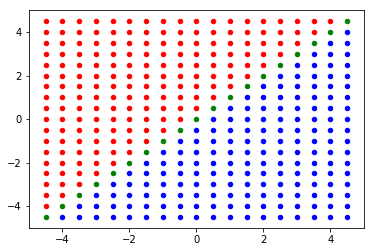

In [ ]:
import notebook_helper

notebook_helper.show_turn_predicate()

# Пересечение двух отрезков.

Два два отрезка координатами их концов $s_1 = (a, b)$, $s_2 = (a, b)$. Проверить, пересекаются ли они?

Если два отрезка не лежат на одной прямой, то необходимым и достаточным условием является то, что концы отрезка $s_1$ лежат по разные стороны относительно отрезка $s_2$ и наоборот. Иначе все предикаты будут равны 0, поэтому проверим их AABB(axis-aligned bounding box) на пересечение. Все это можно записать следующим образом:

$$ s_1 \cap s_2 \Longleftrightarrow 
\begin{equation}
 \begin{cases}
   turn(a, b, c) \cdot turn(a, b, d) \leqslant 0, &\text{ }\\
   turn(c, d, a) \cdot turn(c, d, b) \leqslant 0, &\text{ }\\
   AABB(s_1) \cap AABB(s_2) \ne \varnothing. &\text{ }
 \end{cases}
\end{equation} $$




In [33]:
import notebook_helper

def do_intersect(seg1, seg2):
    return bentley_ottman_helper.do_intersect(seg1, seg2)  #Заглушка

notebook_helper.intersection_checking_testing(do_intersect)


100  tests done
200  tests done
300  tests done
400  tests done
500  tests done
600  tests done
700  tests done
800  tests done
900  tests done
1000  tests done
Correct solution


## Задание

Реализовать нахождение множества пересечения двух отрезков. Вернуть надо отрезок пересечения или $None$, если они не пересекаются.


In [ ]:
def segments_intersection_set(f, s):
    return bentley_ottman_helper.segments_intersection_set(f, s)


notebook_helper.segments_intersection_set_testing(segments_intersection_set)

100  tests done
200  tests done
300  tests done
400  tests done
500  tests done
600  tests done
700  tests done
800  tests done


## Алгоритм Бентли-Отмана

Теперь научимся решать задачу о пересечении множества отрезков быстрее. Количество пересечений может быть квадрат и с этим ничего не поделаешь. Но если их сильно меньше, то предыдущий алгоритм будет не самым оптимальным. 

Для начала зададим отношение $<$ на точках: ($x1$, $y1$) < ($x2$, $y2$) $\equiv$ $x1$ < $x2$ or $x1$=$x2$ and $y1$<$y2$.

Так же введем понятие "событие" ($event$). Будем называть событиями начало и конец отрезков, а так же их пересечение. Каждое событие будет характеризоваться точкой в пространстве, а множество событий последнего типа является ответом на нашу задачу. События упорядочиваются по их координатам, а при равенстве сначала идут события начал, затем пересечений, а последними события концов. 

Будем обрабатывать события с помощью сканирующей прямой. Сканирующая прямая будет двигаться в порядке увеличения значения по абсцисе, а потом по ординате. В каждый момент времени будем хранить какое-то множество событий и делать модификации, когда дойдем сканирующей прямой до следующего события. Заведем очередь появления событий, куда в начальный момент времени добавим все события начал и концов отрезков. Вытаскивать из очереди будем в порядке увеличения координат событий относительно заданного ранее порядка $<$. 


3.5.2 (default, Sep 14 2017, 22:51:06) 
[GCC 5.4.0 20160609]


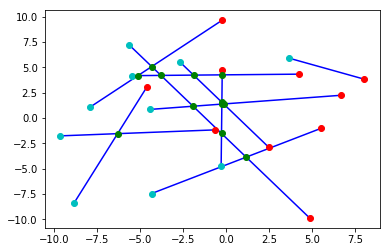

Iteration order
{-9.65, -1.76}
{-8.85, -8.42}
{-7.89, 1.10}
{-6.31, -1.54}
{-5.64, 7.23}
{-5.46, 4.18}
{-5.12, 4.19}
{-4.59, 3.10}
{-4.43, 0.85}
{-4.33, -7.44}
{-4.32, 5.08}
{-3.79, 4.21}
{-2.66, 5.49}
{-1.92, 1.17}
{-1.89, 4.24}
{-0.68, -1.17}
{-0.29, -4.68}
{-0.27, -1.52}
{-0.25, 1.38}
{-0.25, 1.56}
{-0.24, 9.65}
{-0.23, 4.26}
{-0.23, 4.75}
{-0.15, 1.39}
{1.16, -3.85}
{2.46, -2.87}
{3.63, 5.92}
{4.20, 4.33}
{4.84, -9.84}
{5.49, -1.02}
{6.67, 2.25}
{8.02, 3.84}


In [29]:
import notebook_helper

notebook_helper.show_events_handle_order()

Так же давайте в каждый момент времени будем хранить набор отрезков $sortedSegSet_{x_i, y_i}$, у которых мы уже обработали событие начала, но еще не обработали событие конца. В каждый момент времени $x_i$, набор будет упорядочен по значению $y_{seg_j}(x_i)$, то есть набор будет сортирован по значению $y$-координаты отрезков в точке $x_i$. 

##### Примеры состояний  множества $sortedSegSet$
![Intersected segments set state](images/2.png)

#### Обозначения

$bef_e$/$aft_e$ - момент времени когда событие $e$ первое обработанное/необработанное.

$prev_e$/$next_e$ - предыдущее/следующее $е$ событие в отсортированном списке всех событий  

### Теорема

$(x_i, y_i)$ - момент времени, $sortedSegSet_{x_i, y_i}$ - отсортированный набор отрезков в момент времени $x_{i}, y_{i}$. $e_{l}$, $e_{r}$ - такие события, что $e_{l} \lt (x_i, y_i) \lt e_{r}$ $\wedge$ $\forall j : e_j \le e_{l} \vee e_{r} \le e_j$, где $P_x(y)$ - координата x события y. То есть $e_l$ и $e_r$ - последовательный события, происходящие в разные момент времени. Тогда для любого момента времени ($x_k, y_k$), $(x_i, y_i) \lt (x_k, y_k) \lt e_r$: 
1. $seg \in sortedSegSet_{x_k, y_k} \iff seq \in sortedSegSet_{x_i, y_i}$
2. $sortedSegSet_{x_k, y_k}=sortedSegSet_{x_i, y_i}$

#### Доказательство:
$\triangleright$
<div style="padding-left:40px">

1. Так как $\nexists e: e -$  событие, $(x_i, y_i) \le e \le (x_k, y_k)$, то значит в множество $sortedSegSet_{x_i, y_i}$ ничего не добавляли и не удаляли.
</div>


<div style="padding-left:40px">
2. Будем доказывать от противного. Рассмотрим два отрезка $f$, $s$, что:
$ind_f(sortedSegSet_{x_i, y_i}) \lt ind_s(sortedSegSet_{x_i, y_i})$, $ind_f(sortedSegSet_{x_k, y_k}) \gt ind_s(sortedSegSet_{x_k, y_k})$, где $ind_f(s)$ - упорядоченный номер элемента $f$ в множестве $s$. Это значит, что отрезки $f$ и $s$ пересекаются в точке $(x_t, y_t)$: $(x_i, y_i) \le (x_t, y_t) \le (x_k, y_k)$. Но по условию теоремы такого события не существует, а значит мы пришли к противоречию. 
</div>

$\triangleleft$

### Теорема

Пусть $e_n$ - событие пересечения в точке $(p_x, p_y)$, только что взятое из очереди. Тогда $\nexists i, j, k: i \lt j \lt k$, что пары $(sortedSegSet_i, sortedSegSet_j)$ и $(sortedSegSet_j, sortedSegSet_k)$ не пересекаются в точке $(p_x, p_y)$, но $(sortedSegSet_i, sortedSegSet_k)$ пересекаются.

#### Доказательство:

$\triangleright$
<div style="padding-left:40px">
Рассмотрим сужение $sortedSegSet$ до множества $\{sortedSegSet_i, sortedSegSet_j, sortedSegSet_k\}$. Тогда после обработки точки пересечения $(p_x, p_y)$, порядок между $sortedSegSet_i$ и $sortedSegSet_k$  изменится. Результирующее суженное множестве $sortedSegSet$ может иметь три вида:
 
1. $\{sortedSegSet_k, sortedSegSet_i, sortedSegSet_j\}$ - тогда отрезки $j$, $k$ должны пересекаться 
2. $\{sortedSegSet_k, sortedSegSet_j, sortedSegSet_i\}$ - тогда отрезки $i$, $k$ должны пересекаться
3. $\{sortedSegSet_j, sortedSegSet_k, sortedSegSet_i\}$ - тогда пары отрезков $i$, $k$ и $j$, $k$ должны пересекаться
</div>

$\triangleleft$


#### Следствие:

Пусть событие $e$ - событие пересечения, пусть k отрезков из $sortedSegSet$ пересекаются в точке события $e$. Тогда множество этих отрезков в $sortedSegSet$ будет являться подотрезком $sortedSegSet$.

Последняя теорема позволяет нам рассматривать точки пересечения не всех пар отрезков из $sortedSegSet$, а только соседних. Это значит, что количество событий в любой момент времени не будет превыщать количества отрезков. Таким образом будем хранить для всех пар соседних отрезков точку их пересечения. Пусть на следующей итерации мы получим событие начала или конца отрезка. Нужным образом добавим или удалим отрезок в множества $sortedSegSet$, при этом добавив и удалив соответствующие события пересечений из множества событий(после добавления и удаления пары отрезков, которые были соседями, могут перестать быть таковыми и наоборот). Если же очередное событие - это событие пересечения, то добавим его в ответ и обработаем изменение в $sortedSegSet$. 

### Теорема

Пусть событие $e$ - событие пересечения, пусть k отрезков из $sortedSegSet$ пересекаются в точке события $e$. Тогда после обработки данного события отрезки будут лежать в $sortedSegSet$ в обратном порядке.

#### Доказательство - упражнение

#### Подсказка:

Рассмотреть определение $sortedSegSet$, угол наклона и монотонность прямых, соответствующих отрезкам.
